In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np 
import ast


# First cleaning of the dataset

In [118]:

# Load the csv file 
dataset = pd.read_csv('book_adaptation.csv')
# Display the first few rows
dataset.head()


,movie_title,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,imdb_rating,imdb_total_votes,movie_budget,...,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_rating,book_publisher,book_ratings_count,book_pages,movie_is_adaptation
0,Ghosts of Mars,2001.0,777058.028297,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",4.9,58888.0,1.552915e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",6.1,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,Brun bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",5.6,42.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,White Of The Eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",6.1,3090.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,A Woman in Flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",5.9,648.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [119]:
dataset.describe()

,movie_release,movie_revenue,movie_runtime,imdb_rating,imdb_total_votes,movie_budget,book_release,book_part_of_series,literary_work,written_work,...,book_science_fiction,book_horror,book_thriller,book_detective,book_satire,book_comedy,book_won_price,book_rating,book_ratings_count,book_pages
count,75130.000000,9.897000e+03,6.153600e+04,63615.000000,6.361500e+04,1.769500e+04,4161.000000,5062.000000,5062.000000,5062.000000,...,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000,3230.000000,3.231000e+03,3153.000000
mean,1977.492333,3.117755e+06,1.118020e+02,6.197835,1.222808e+04,6.584343e+05,1938.311944,0.115172,0.780126,0.202094,...,0.060846,0.036152,0.034571,0.049388,0.016397,0.025484,0.080798,3.886421,1.572839e+05,289.345385
std,29.090768,8.035250e+06,4.351383e+03,1.144797,7.128692e+04,1.252345e+06,54.999325,0.319261,0.414202,0.401602,...,0.239070,0.186686,0.182709,0.216697,0.127008,0.157605,0.272552,0.249760,4.168301e+05,196.087574
min,1010.000000,5.822935e-02,0.000000e+00,1.000000,5.000000e+00,4.342586e-02,1678.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000
25%,1956.000000,1.965851e+05,8.100000e+01,5.600000,1.220000e+02,5.317417e+04,1905.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.740000,2.207000e+03,164.000000
50%,1985.000000,8.258427e+05,9.300000e+01,6.300000,5.450000e+02,2.658709e+05,1952.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000,1.431900e+04,257.000000
75%,2004.000000,2.778871e+06,1.060000e+02,7.000000,2.584000e+03,7.101449e+05,1981.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.060000,1.050280e+05,368.000000
max,2016.000000,2.831111e+08,1.079281e+06,10.000000,2.960759e+06,5.246682e+07,2013.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.620000,6.726008e+06,1720.000000


First we're going to correct the "movie_language", "movie_countries" and "movie_genres". Indeed, these columns contain dictionary-like structures that need to be parsed and converted into more straightforward formats

In [120]:
from numpy import split
import ast

def parse_dict_column(column):
    """Parses a column containing dictionary-like strings and extracts the values."""
    try:
        # Safely evaluate the string to a Python dictionary
        parsed_col = ast.literal_eval(column)
        # Join the values if the evaluation returns a dictionary
        if isinstance(parsed_col, dict):
            return '; '.join(parsed_col.values())
    except (ValueError, SyntaxError):
        return column  # Return the original if parsing fails

# Apply the function to the columns
dataset['movie_languages'] = dataset['movie_languages'].apply(parse_dict_column)
dataset['movie_countries'] = dataset['movie_countries'].apply(parse_dict_column)
dataset['movie_genres'] = dataset['movie_genres'].apply(parse_dict_column)
# Check the results
dataset[['movie_languages', 'movie_countries', 'movie_genres']].head()


,movie_languages,movie_countries,movie_genres
0,English Language,United States of America,Thriller; Science Fiction; Horror; Adventure; ...
1,English Language,United States of America,Mystery; Biographical film; Drama; Crime Drama
2,Norwegian Language,Norway,Crime Fiction; Drama
3,English Language,United Kingdom,Thriller; Erotic thriller; Psychological thriller
4,German Language,Germany,Drama


Instead of having English Language , German Language... We would rather have the language alone, to have a simpler analysis later on.

In [121]:

# Function to clean up the language format safely
def clean_language_format(language_data):
    if pd.isna(language_data):  
        return language_data
    try:
        # Parse the string to a dictionary
        language_dict = ast.literal_eval(language_data)
        # Clean up the keys and values
        return {key.replace(" Language", "").strip(): value.replace(" Language", "").strip() for key, value in language_dict.items()}
    except (ValueError, SyntaxError):
        # If parsing fails, handle it as a raw string
        return language_data.replace(" Language", "").strip()

# Apply the function to the 'movie_languages' column
dataset['movie_languages'] = dataset['movie_languages'].apply(clean_language_format)
dataset['movie_languages'].head()


0      English
1      English
2    Norwegian
3      English
4       German
Name: movie_languages, dtype: object

In [122]:
# We need to assert the absence of duplicates among the dataset
duplicates_initial= sum(dataset.duplicated())
print('Initially the number of duplicates was: ',duplicates_initial)

#Removing the duplicated rows and checking their deletion
dataset=dataset.drop_duplicates()
duplicates_final=sum(dataset.duplicated())
print('Afterwards the number of duplicates becomes: ',duplicates_final)


Initially the number of duplicates was:  78
Afterwards the number of duplicates becomes:  0


In [123]:
dataset['movie_genres'] = dataset['movie_genres'].apply(lambda x: x.split('; '))
dataset['movie_languages'] = dataset['movie_languages'].apply(lambda x: x.split('; '))
dataset['movie_countries'] = dataset['movie_countries'].apply(lambda x: x.split('; '))

# Handling missing values

One important factor to aknowledge for when analyzing data is the way we handle missing values. First, we need to see where they are mostly present

In [124]:
def proportion_missing_values(data, feature, group, adaptation=False):
    return data[data['movie_is_adaptation'] == adaptation].groupby(group)[feature].apply(lambda x: x.isna().mean() * 100)

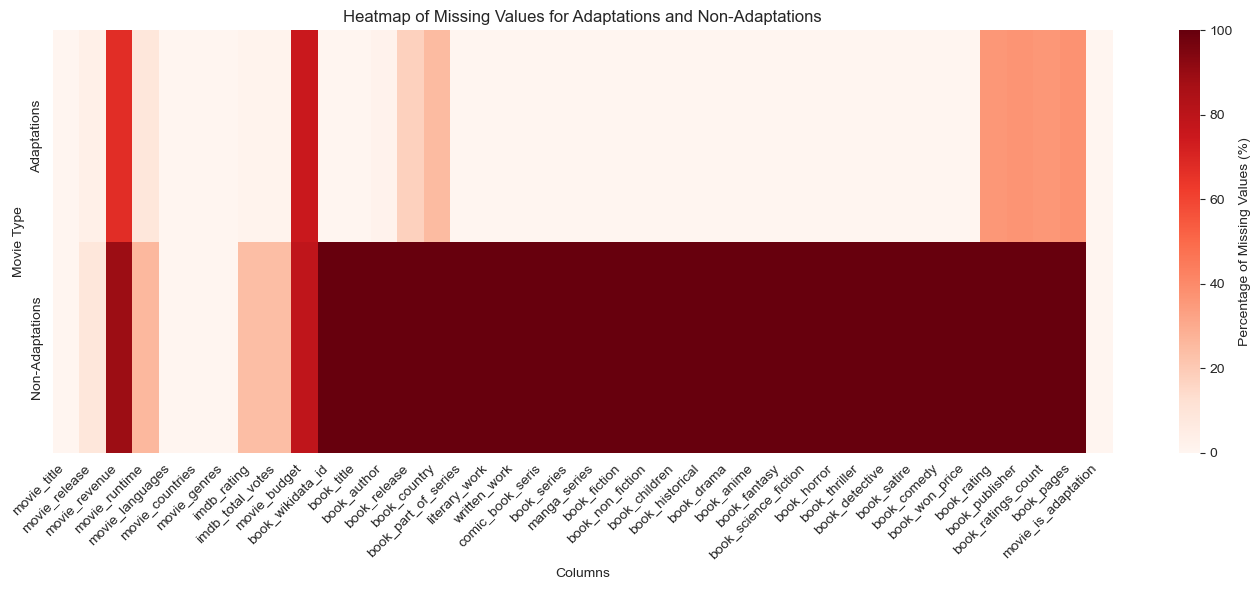

In [125]:
# Calculate missing values for movie adaptations
missing_values_adaptations = dataset[dataset['movie_is_adaptation'] == True].isna().sum() / len(dataset[dataset['movie_is_adaptation'] == True]) * 100

# Calculate missing values for non-adaptations
missing_values_non_adaptations = dataset[dataset['movie_is_adaptation'] == False].isna().sum() / len(dataset[dataset['movie_is_adaptation'] == False]) * 100

# Prepare data for heatmap
missing_values_df = pd.DataFrame({
    'Adaptations': missing_values_adaptations,
    'Non-Adaptations': missing_values_non_adaptations
}).T

plt.figure(figsize=(14, 6))
sns.heatmap(missing_values_df, annot=False, fmt=".1f", cmap='Reds', cbar_kws={'label': 'Percentage of Missing Values (%)'})
plt.title('Heatmap of Missing Values for Adaptations and Non-Adaptations')
plt.xlabel('Columns')
plt.ylabel('Movie Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


We clearly see that the critical columns to handle are the movie revenue and movie budget. For the non adaptation movies, it is normal not to have informations related to books.

In [126]:
#Analyzing missing data over time

# Calculate the percentage of missing revenue and budget data by year
missing_revenue_by_year_adapt = proportion_missing_values(dataset, 'movie_revenue', 'movie_release', True)
missing_revenue_by_year_non_adapt = proportion_missing_values(dataset, 'movie_revenue', 'movie_release', False)
missing_budget_by_year_adapt = proportion_missing_values(dataset, 'movie_budget', 'movie_release', True)
missing_budget_by_year_non_adapt = proportion_missing_values(dataset, 'movie_budget', 'movie_release', False)


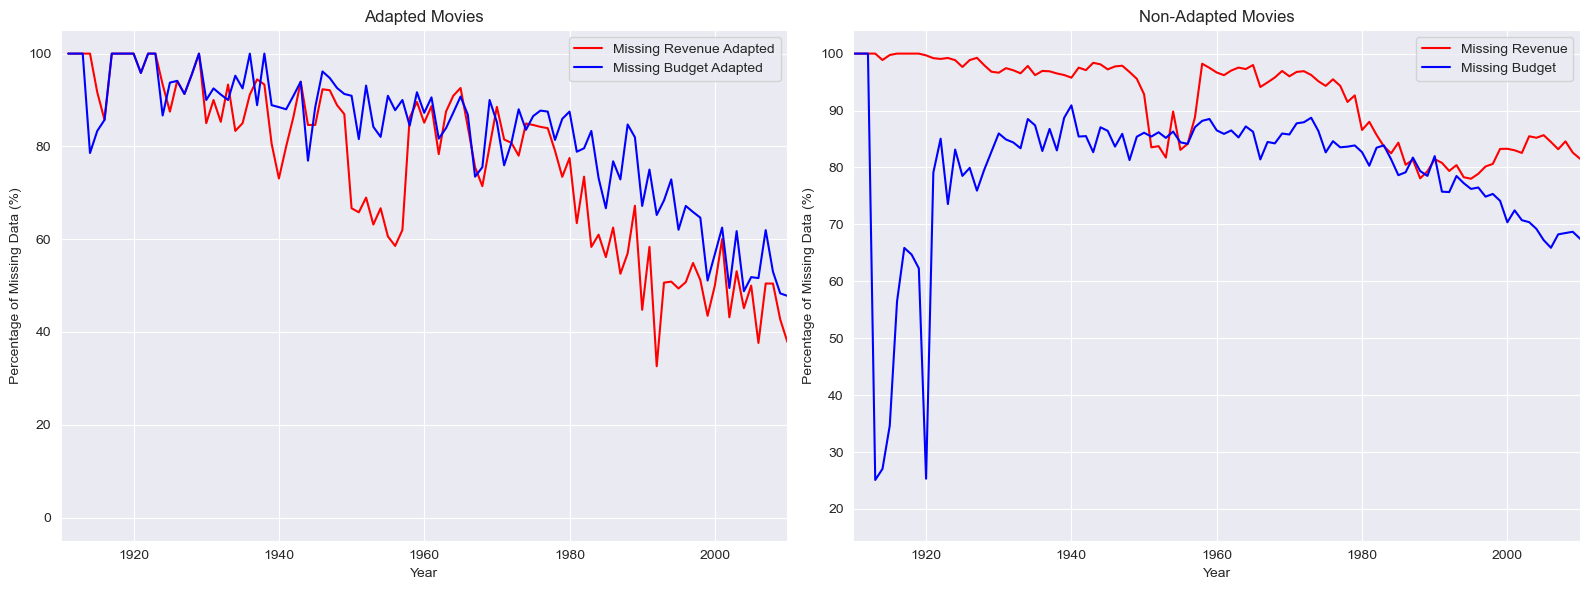

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(missing_revenue_by_year_adapt.index, missing_revenue_by_year_adapt, label='Missing Revenue Adapted', color='red')
ax1.plot(missing_budget_by_year_adapt.index, missing_budget_by_year_adapt, label='Missing Budget Adapted', color='blue')
ax1.set_title('Adapted Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage of Missing Data (%)')
ax1.set_xlim([1910, 2010])
ax1.grid(True)
ax1.legend()

ax2.plot(missing_revenue_by_year_non_adapt.index, missing_revenue_by_year_non_adapt, label='Missing Revenue', color='red')
ax2.plot(missing_budget_by_year_non_adapt.index, missing_budget_by_year_non_adapt, label='Missing Budget', color='blue')
ax2.set_title('Non-Adapted Movies')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage of Missing Data (%)')
ax2.set_xlim([1910, 2010])
ax2.grid(True)
ax2.legend()

plt.tight_layout()

plt.show()

## Handling movie revenue and movie budget
From what we can see, those 2 columns appear to have many missing values. In order to tackle this problem we fetched some more data about revenues using Wikidata. You can see how we proceeded on the data_extraction.ipynb notebook. The new dataframe is stored as books_and_movies.csv. We are going to do the same analysis on this new dataframe and see if we get some better results.

In [128]:
dataset_with_rev_budg = pd.read_csv('books_and_movies.csv')
dataset_with_rev_budg=dataset_with_rev_budg.drop_duplicates()

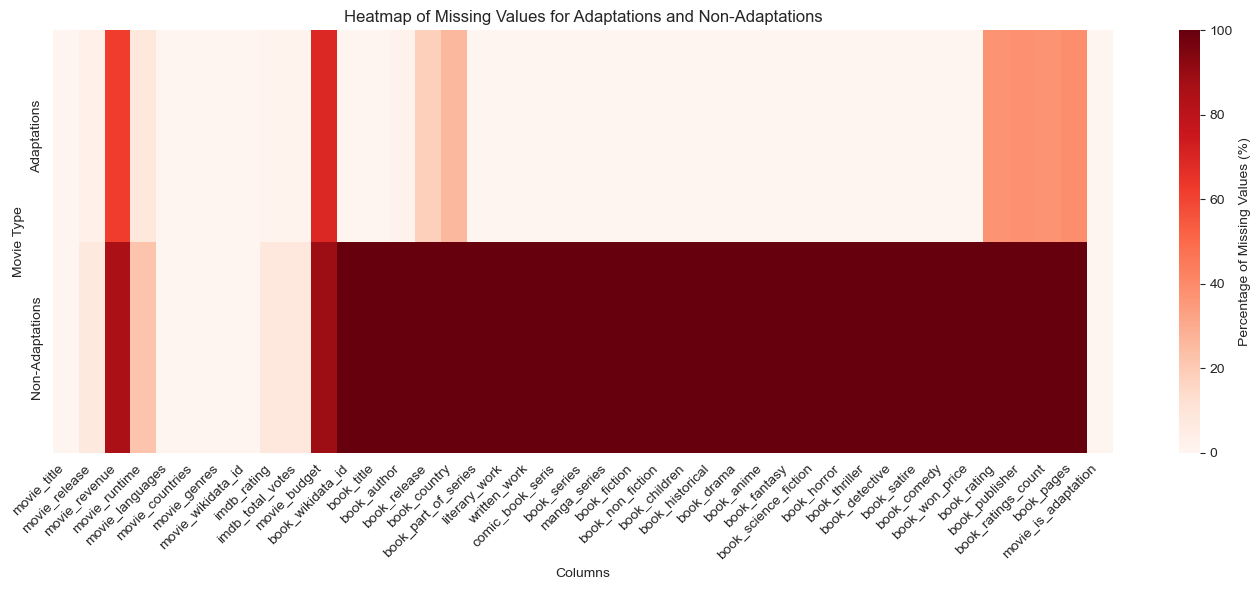

In [129]:

# Calculate missing values for movie adaptations
missing_values_adaptations = dataset_with_rev_budg[dataset_with_rev_budg['movie_is_adaptation'] == True].isna().sum() / len(dataset_with_rev_budg[dataset_with_rev_budg['movie_is_adaptation'] == True]) * 100

# Calculate missing values for non-adaptations
missing_values_non_adaptations = dataset_with_rev_budg[dataset_with_rev_budg['movie_is_adaptation'] == False].isna().sum() / len(dataset_with_rev_budg[dataset_with_rev_budg['movie_is_adaptation'] == False]) * 100

# Prepare data for heatmap
missing_values_df = pd.DataFrame({
    'Adaptations': missing_values_adaptations,
    'Non-Adaptations': missing_values_non_adaptations
}).T

plt.figure(figsize=(14, 6))
sns.heatmap(missing_values_df, annot=False, fmt=".1f", cmap='Reds', cbar_kws={'label': 'Percentage of Missing Values (%)'})
plt.title('Heatmap of Missing Values for Adaptations and Non-Adaptations')
plt.xlabel('Columns')
plt.ylabel('Movie Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [130]:
missing_revenue_by_year_adapt = proportion_missing_values(dataset_with_rev_budg, 'movie_revenue', 'movie_release', True)
missing_revenue_by_year_non_adapt = proportion_missing_values(dataset_with_rev_budg, 'movie_revenue', 'movie_release', False)
missing_budget_by_year_adapt = proportion_missing_values(dataset_with_rev_budg, 'movie_budget', 'movie_release', True)
missing_budget_by_year_non_adapt = proportion_missing_values(dataset_with_rev_budg, 'movie_budget', 'movie_release', False)

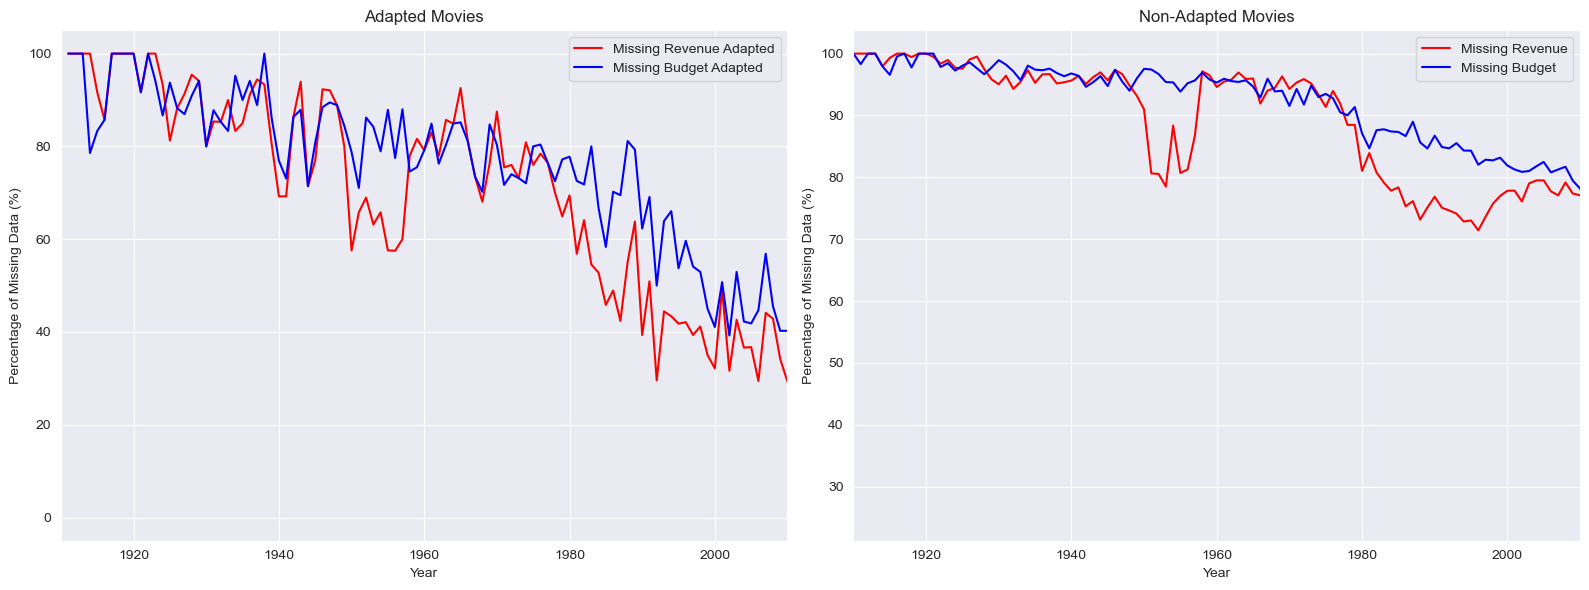

In [131]:
#Analyzing missing data over time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(missing_revenue_by_year_adapt.index, missing_revenue_by_year_adapt, label='Missing Revenue Adapted', color='red')
ax1.plot(missing_budget_by_year_adapt.index, missing_budget_by_year_adapt, label='Missing Budget Adapted', color='blue')
ax1.set_title('Adapted Movies')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage of Missing Data (%)')
ax1.set_xlim([1910, 2010])
ax1.grid(True)
ax1.legend()

ax2.plot(missing_revenue_by_year_non_adapt.index, missing_revenue_by_year_non_adapt, label='Missing Revenue', color='red')
ax2.plot(missing_budget_by_year_non_adapt.index, missing_budget_by_year_non_adapt, label='Missing Budget', color='blue')
ax2.set_title('Non-Adapted Movies')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage of Missing Data (%)')
ax2.set_xlim([1910, 2010])
ax2.grid(True)
ax2.legend()

plt.tight_layout()

plt.show()

In [132]:
missing_budget_count = dataset[dataset['movie_is_adaptation'] == False]['movie_budget'].isna().sum()
print(f"Number of missing values in 'movie_budget': {missing_budget_count}")

missing_budget_count = dataset_with_rev_budg[dataset_with_rev_budg['movie_is_adaptation'] == False]['movie_budget'].isna().sum()
print(f"Number of missing values in 'movie_budget': {missing_budget_count}")

Number of missing values in 'movie_budget': 60470
Number of missing values in 'movie_budget': 53878


We can see that we managed to reduce the number of NaN values. While still being significantly high, it forces us to reduce the size of our dataset when we will have to analyze these features. We cannot drop all the NaN values as the sample dataset will be too small to make accurate decisions

# CHANGE COLUMNS OF THE DATASET TO CORRECT THE REVENUE AND BUDGET

# Handling outliers

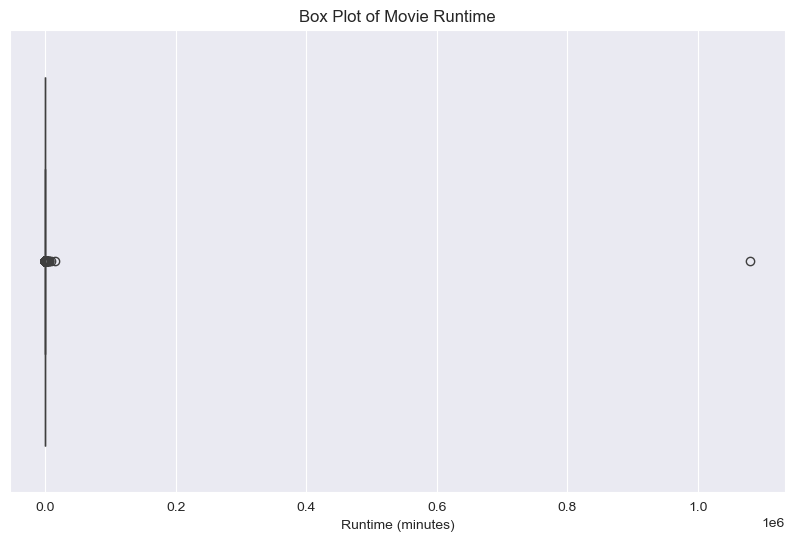

In [135]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['movie_runtime'])
plt.title('Box Plot of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.show()

In [136]:
# We searched for the longest movie existing and it appeared to be 240h long so 14400 min
threshold = 14400

# Identify high outliers
high_outliers = dataset[dataset['movie_runtime'] > threshold]
print("Number of high outliers using percentile:", high_outliers.shape[0])
print("High outliers:\n", high_outliers['movie_runtime'])

#Deletion of the outlier from the dataset
dataset=dataset.drop(high_outliers.index)

Number of high outliers using percentile: 1
High outliers:
 12858    1079281.0
Name: movie_runtime, dtype: float64


# Movies based on books proportion

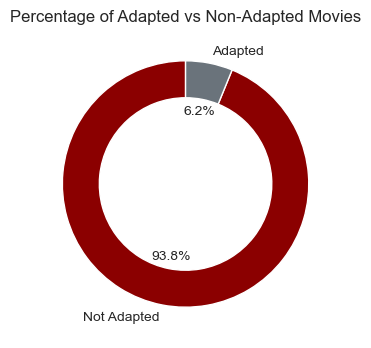

In [133]:
# Calculate the counts of adapted vs non-adapted movies
adapted_counts = dataset['movie_is_adaptation'].value_counts()
labels = ['Not Adapted', 'Adapted']

# Plot the donut chart
plt.figure(figsize=(4, 4))
plt.pie(adapted_counts, labels=labels, autopct='%1.1f%%', colors=['#8B0000', '#6a737b'], startangle=90, wedgeprops=dict(width=0.3))
plt.title('Percentage of Adapted vs Non-Adapted Movies')
plt.show()


Adapted movies represent quite a small proportion of our dataset. This low value may limit the scope of certain conclusions or analyses. One way to handle that would be to balance the data. 

# Balance Data

# Observe and handle the distributions 

For the numerical values, it is important to see how is the distribution and if it is needed to apply some kind of transformation. We're here considering :movie_revenue, movie_budget, imdb_rating, book_rating, book_pages

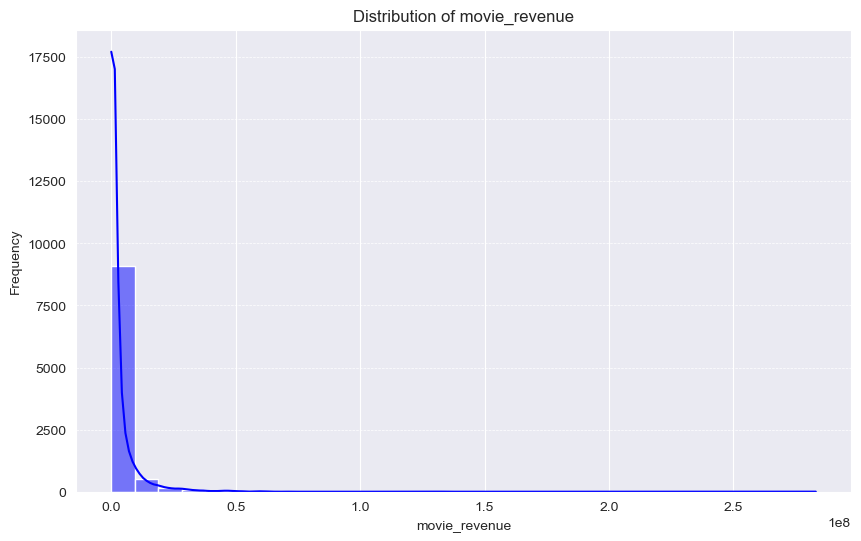

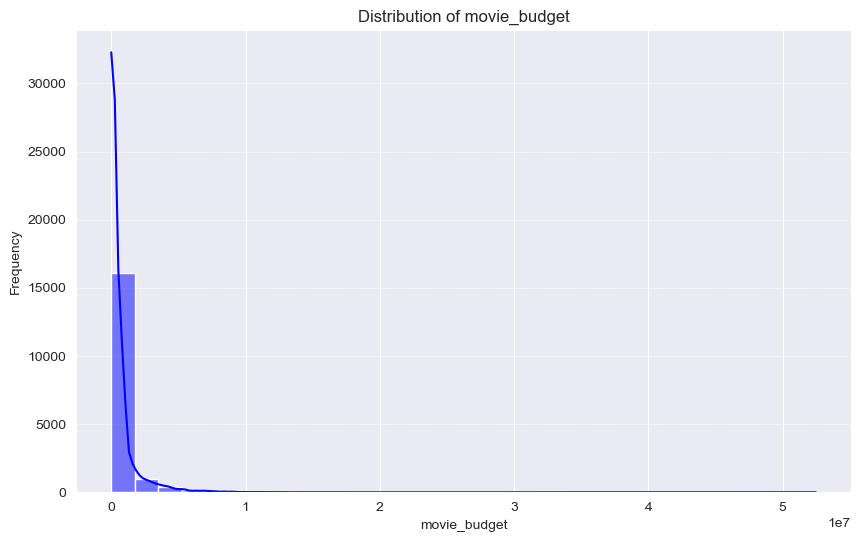

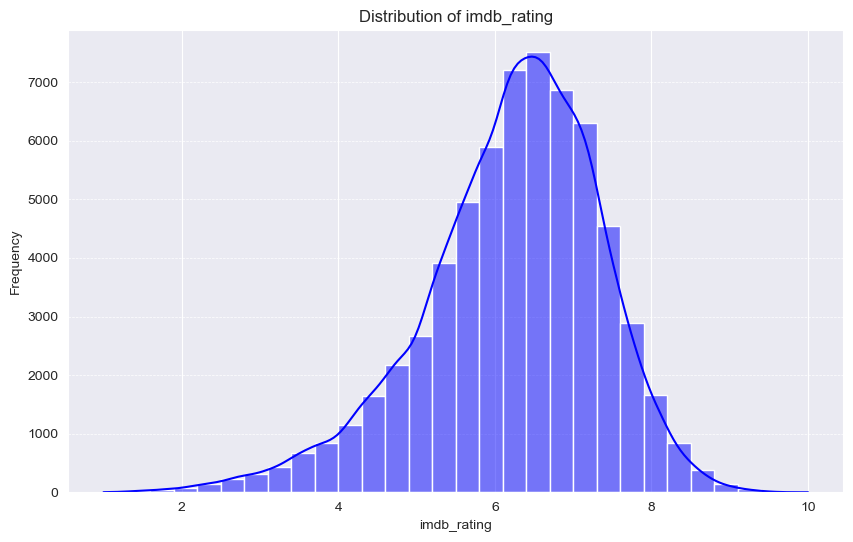

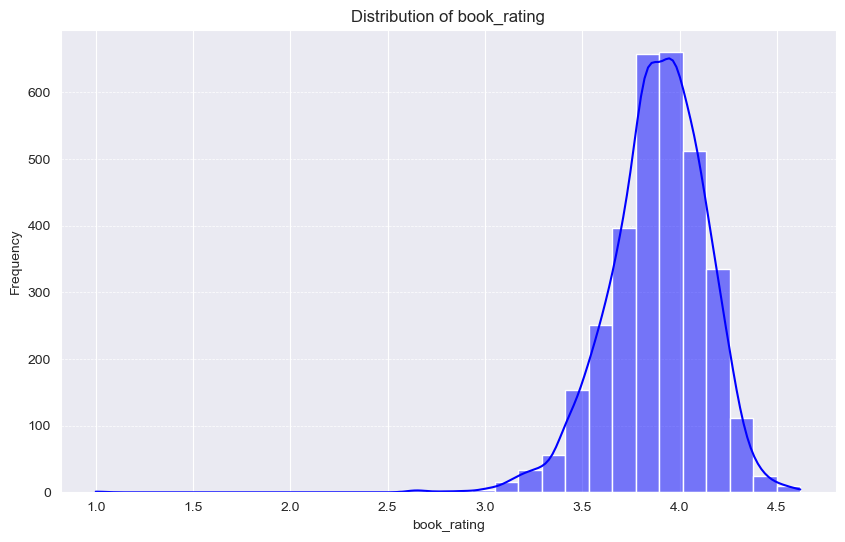

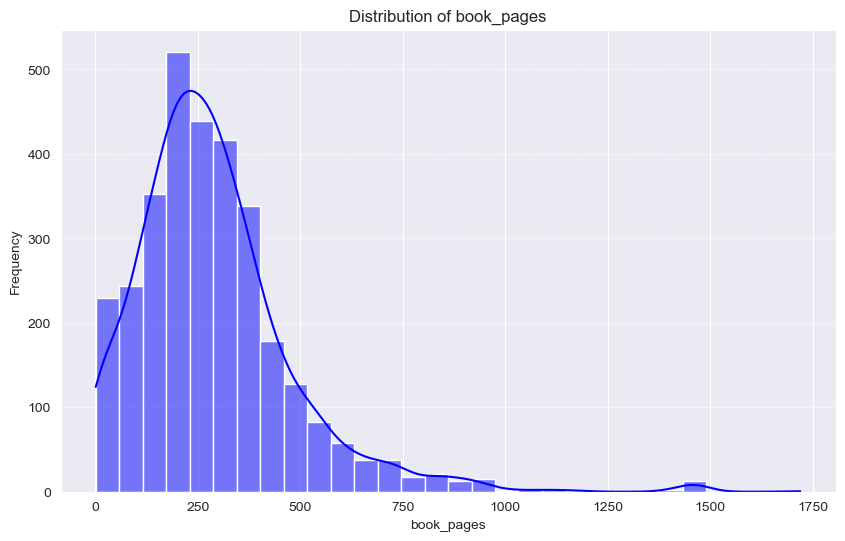

In [134]:

def plot_histograms(df, columns):
    """
    Plot histograms for given columns in a DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    columns (list): List of column names for which to plot histograms.
    """
    for column in columns:
        if column in df.columns:
            plt.figure(figsize=(10, 6))
            sns.histplot(df[column].dropna(), kde=True, bins=30, color='blue')

            

            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.grid(axis='y', linestyle='--', linewidth=0.5)
            plt.show()
        else:
            print(f"Column '{column}' not found in the DataFrame.")

# List of columns to plot
columns_to_plot = ['movie_revenue', 'movie_budget', 'imdb_rating', 'book_rating', 'book_pages']

# Call the function with your dataset and column list
plot_histograms(dataset, columns_to_plot)


The movie revenues and movie budget show 2 heavy tails distributions. A solution one could think of would be to use the log of the values.

In [93]:
from scipy.stats import skew

skewness_revenue = dataset['movie_revenue'].skew()
skewness_budget=dataset['movie_budget'].skew()
print(f"Skewness of movie_revenue: {skewness_revenue}")
print(f"Skewness of movie_budget: {skewness_budget}")

Skewness of movie_revenue: 13.035268432996682
Skewness of movie_budget: 8.226544237894496


## VOIR SI LE FAIRE SUR DATASET OU PAS??

In [ ]:
np.log10()

# Feature engineering 

We may consider creating some features that will later serve for our analysis

In [16]:
# Time gap between movie release and book relase
dataset['time_gap'] = dataset['movie_release'] - dataset['book_release']

#measure profitability of a movie
dataset['revenue_budget_ratio'] = dataset['movie_revenue'] / dataset['movie_budget']
